In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [3]:
df = pd.read_csv('../data/processing/all_features_selected_from_EDA.csv')
df

,GAME_ID,GAME_DATE_EST,HOME_TEAM_ID,TEAM_ID,OPPO_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,MIN,...,vs_oppo1_loc,vs_oppo1_PTS,vs_oppo1_PLUS_MINUS,vs_oppo1_START_POSITION_B,vs_oppo1_START_POSITION_C,vs_oppo1_START_POSITION_F,vs_oppo1_START_POSITION_G,vs_oppo1_season_Pos,vs_oppo1_season_Pre,vs_oppo1_season_Reg
0,42100406,6/16/2022,1610612738,1610612744,1610612738,GSW,Golden State,203952,Andrew Wiggins,2621.0,...,1,26,12,0,0,1,0,1,0,0
1,42100406,6/16/2022,1610612738,1610612744,1610612738,GSW,Golden State,203490,Otto Porter Jr.,783.0,...,1,2,6,0,0,1,0,1,0,0
2,42100406,6/16/2022,1610612738,1610612744,1610612738,GSW,Golden State,203110,Draymond Green,2509.0,...,1,8,11,0,1,0,0,1,0,0
3,42100406,6/16/2022,1610612738,1610612744,1610612738,GSW,Golden State,202691,Klay Thompson,2478.0,...,1,21,13,0,0,0,1,1,0,0
4,42100406,6/16/2022,1610612738,1610612744,1610612738,GSW,Golden State,201939,Stephen Curry,2395.0,...,1,16,15,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444938,40300101,4/17/2004,1610612754,1610612738,1610612754,BOS,Boston,1088,Chucky Atkins,2173.0,...,1,2,-26,0,0,0,1,0,0,1
444939,40300101,4/17/2004,1610612754,1610612738,1610612754,BOS,Boston,1729,Ricky Davis,1900.0,...,1,8,-4,1,0,0,0,0,0,1
444940,40300101,4/17/2004,1610612754,1610612738,1610612754,BOS,Boston,2036,Chris Mihm,1315.0,...,1,8,4,1,0,0,0,0,0,1
444941,40300101,4/17/2004,1610612754,1610612738,1610612754,BOS,Boston,2556,Marcus Banks,707.0,...,1,0,8,1,0,0,0,0,0,1


In [4]:
cor_matrix=df.corr()
cor_matrix.to_csv('cor_matrix.csv')

In [13]:
def pure(row):
    return row['PTS']/row['avg_oppo_82_PTS']
PureSeries = df.apply(lambda row: pure(row), axis=1)
PureSeries

0         1.243421
1         0.414474
2         1.032787
3         0.712871
4         2.019802
            ...   
444938    1.559560
444939    3.708178
444940    1.756506
444941    0.390335
444942    0.390335
Length: 444943, dtype: float64

In [15]:
PureSeries = PureSeries.loc[::-1]
PureSeries

444942    0.390335
444941    0.390335
444940    1.756506
444939    3.708178
444938    1.559560
            ...   
4         2.019802
3         0.712871
2         1.032787
1         0.414474
0         1.243421
Length: 444943, dtype: float64

c:\users\jliu471\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


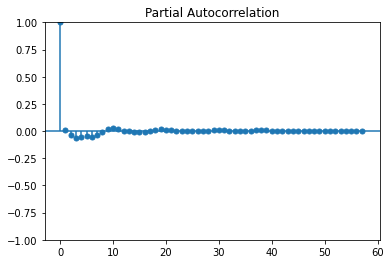

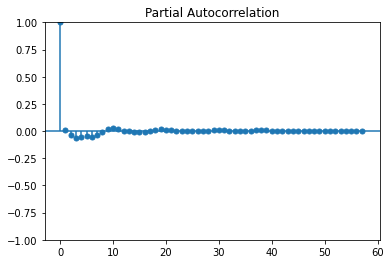

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_pacf(PureSeries)

In [7]:
df['PLUS_MINUS'].corr(df['random'])

-0.0011507114121939166

In [5]:
# analysis of year's effect on relationships between target variables and features
years = ['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

In [6]:
# correlation change over time PTS
pd.set_option('display.max_rows', 500)
params_list = []
for year in years:
    df_year = df[df['GAME_DATE_EST'].str.contains(year)]
    params_list.append(df_year[df_year.columns[1:]].corr()['PTS'][:])
df_params = pd.concat(params_list, axis=1)
df_params # no need to drop

,PTS,PTS,PTS,PTS,PTS,PTS,PTS,PTS,PTS,PTS,PTS,PTS,PTS,PTS,PTS,PTS,PTS,PTS,PTS
HOME_TEAM_ID,-0.006812,-0.000672,-0.002090,-0.002841,-0.002515,-0.000507,0.005900,0.013094,0.002896,-0.011832,-0.013217,-0.001082,-0.004694,-0.006622,-0.015780,0.005318,-0.005844,0.007960,0.019690
TEAM_ID,0.004892,0.003317,-0.006073,-0.010248,-0.016559,-0.006319,0.000819,0.010844,-0.012243,-0.014109,-0.023830,-0.010194,0.001902,-0.011818,-0.020574,0.004464,0.000698,0.010972,0.025568
OPPO_ID,-0.008001,-0.006874,0.003587,0.007918,0.008863,0.012513,0.004365,0.015247,0.005936,-0.011281,-0.009605,-0.008163,-0.008769,-0.003178,-0.011830,-0.000547,-0.012102,0.009729,0.016598
PLAYER_ID,0.033786,0.007379,-0.079751,-0.130840,-0.135669,-0.071431,-0.054314,-0.041065,0.019758,0.005583,0.002246,0.043653,-0.050121,-0.118991,-0.127232,-0.108654,-0.104792,-0.103204,-0.056148
MIN,0.757468,0.752581,0.750650,0.754065,0.756616,0.742579,0.749490,0.736517,0.732348,0.737992,0.724713,0.715413,0.710711,0.711231,0.709548,0.702780,0.705542,0.714580,0.724142
FGM,0.957108,0.957935,0.958982,0.959099,0.959511,0.958974,0.957802,0.956871,0.958333,0.958306,0.956894,0.955005,0.957944,0.959388,0.961524,0.960919,0.960594,0.966308,0.966120
FGA,0.878528,0.886876,0.890180,0.887056,0.883597,0.884067,0.878875,0.876776,0.875931,0.873966,0.871907,0.866887,0.874165,0.878214,0.872709,0.878607,0.876701,0.884007,0.886120
FG_PCT,0.447880,0.424763,0.434408,0.450056,0.454957,0.431476,0.459788,0.430931,0.464264,0.467189,0.442741,0.451486,0.426000,0.423624,0.429232,0.423648,0.417824,0.420819,0.416295
FG3M,0.477110,0.490782,0.515676,0.496946,0.496544,0.488920,0.481019,0.460206,0.486253,0.508678,0.532857,0.550047,0.590393,0.611081,0.609981,0.632623,0.643070,0.643222,0.639548
FG3A,0.447778,0.475501,0.490746,0.465137,0.468867,0.453603,0.432447,0.416811,0.436412,0.460496,0.484604,0.491572,0.545649,0.567093,0.558940,0.592270,0.594222,0.597897,0.599489


In [7]:
# correlation change over time PLUS_MINUS
pd.set_option('display.max_rows', 500)
params_list = []
for year in years:
    df_year = df[df['GAME_DATE_EST'].str.contains(year)]
    params_list.append(df_year[df_year.columns[1:]].corr()['PLUS_MINUS'][:])
df_params = pd.concat(params_list, axis=1)
df_params  # no need to drop

,PLUS_MINUS,PLUS_MINUS,PLUS_MINUS,PLUS_MINUS,PLUS_MINUS,PLUS_MINUS,PLUS_MINUS,PLUS_MINUS,PLUS_MINUS,PLUS_MINUS,PLUS_MINUS,PLUS_MINUS,PLUS_MINUS,PLUS_MINUS,PLUS_MINUS,PLUS_MINUS,PLUS_MINUS,PLUS_MINUS,PLUS_MINUS
HOME_TEAM_ID,-0.009304,0.001685,-0.000096,-0.000561,-0.000565,-0.000265,0.001034,-0.002373,0.000267,-0.000108,-0.000387,0.000496,0.001542,-0.001737,0.001024,-0.004153,0.000599,0.002825,0.004014
TEAM_ID,0.072146,0.021896,0.002424,-0.006873,-0.064471,-0.070496,-0.034316,-0.063463,-0.037743,-0.017922,-0.005910,-0.012110,-0.006348,-0.024269,0.021421,-0.004280,-0.019652,-0.016439,-0.047695
OPPO_ID,-0.094384,-0.030309,-0.000574,0.007967,0.067895,0.070402,0.035406,0.061547,0.043110,0.018462,0.004205,0.015160,0.007560,0.021078,-0.022463,-0.002685,0.013458,0.019538,0.055831
PLAYER_ID,-0.001989,-0.027864,-0.039867,-0.032700,-0.048074,-0.059420,-0.058679,-0.056041,-0.044063,-0.046607,-0.035570,-0.020214,-0.032791,-0.050890,-0.047511,-0.059677,-0.044997,-0.054109,-0.021960
MIN,0.129414,0.130205,0.125913,0.116918,0.106914,0.106224,0.118109,0.117770,0.132279,0.112870,0.116064,0.119867,0.117821,0.125891,0.122108,0.111114,0.094055,0.100807,0.100464
FGM,0.195174,0.195312,0.192918,0.196577,0.193974,0.191153,0.194355,0.187184,0.213646,0.203132,0.204230,0.213517,0.206265,0.210540,0.207856,0.201251,0.190162,0.189811,0.198480
FGA,0.090916,0.097245,0.098881,0.098798,0.089706,0.091109,0.089327,0.089408,0.109361,0.094376,0.096760,0.106621,0.098553,0.105814,0.105168,0.097919,0.080445,0.085145,0.090381
FG_PCT,0.198103,0.189244,0.190452,0.195888,0.200553,0.190273,0.199086,0.188154,0.204652,0.200243,0.199356,0.201393,0.199636,0.200686,0.195744,0.198293,0.195847,0.196611,0.196032
FG3M,0.146600,0.147901,0.147885,0.148696,0.144122,0.151110,0.141829,0.154347,0.142548,0.150352,0.165535,0.181140,0.170989,0.190137,0.175762,0.177151,0.171533,0.174107,0.183900
FG3A,0.083157,0.084027,0.078346,0.075154,0.074371,0.075988,0.065684,0.084277,0.074895,0.074539,0.085726,0.095759,0.090575,0.101926,0.089120,0.084949,0.064930,0.073366,0.075404


In [8]:
# correlation change with different season type PTS
pd.set_option('display.max_rows', 500)
season_types = ['Pos', 'Pre', 'Reg']
params_list = []
for season_type in season_types:
    df_season = df[df[f'season_{season_type}'] == 1]
    params_list.append(df_season[df_season.columns[1:]].corr()['PTS'][:])
df_params = pd.concat(params_list, axis=1)


In [9]:
df_params # we need to drop pre season games for PTS

,PTS,PTS,PTS
HOME_TEAM_ID,-0.001789,0.015875,-0.003184
TEAM_ID,-0.002340,0.025074,-0.007196
OPPO_ID,0.000990,0.005008,-0.001078
PLAYER_ID,-0.058539,-0.007380,-0.014268
MIN,0.756684,0.599191,0.724906
FGM,0.965013,0.937890,0.959265
FGA,0.900489,0.800798,0.878308
FG_PCT,0.431622,0.453857,0.438898
FG3M,0.573700,0.596982,0.548169
FG3A,0.560861,0.500832,0.501478


In [10]:
# correlation change with different season type PLUS_MINUS
pd.set_option('display.max_rows', 500)
season_types = ['Pos', 'Pre', 'Reg']
params_list = []
for season_type in season_types:
    df_season = df[df[f'season_{season_type}'] == 1]
    params_list.append(df_season[df_season.columns[1:]].corr()['PLUS_MINUS'][:])
df_params = pd.concat(params_list, axis=1)
df_params # we need to drop pre season games for PLUS_MINUS

,PLUS_MINUS,PLUS_MINUS,PLUS_MINUS
HOME_TEAM_ID,0.000305,-0.003169,-0.000042
TEAM_ID,-0.015384,0.005780,-0.019472
OPPO_ID,0.016241,-0.010535,0.018973
PLAYER_ID,-0.019295,-0.019287,-0.024433
MIN,0.102002,0.059664,0.118608
FGM,0.186151,0.205685,0.201193
FGA,0.091895,0.069974,0.097443
FG_PCT,0.173494,0.207787,0.198693
FG3M,0.164650,0.188359,0.160142
FG3A,0.080975,0.076392,0.079317


In [12]:
# correlation change with different start position PTS
pd.set_option('display.max_rows', 500)
start_positions = ['B', 'C', 'F', 'G']
params_list = []
for start_position in start_positions:
    df_position = df[df[f'START_POSITION_{start_position}'] == 1]
    print(len(df_position.index))
    params_list.append(df_position[df_position.columns[1:]].corr()['PTS'][:])
df_params = pd.concat(params_list, axis=1)
df_params # should separate to 2 models for PTS

216994
45992
91176
90781


,PTS,PTS,PTS,PTS
HOME_TEAM_ID,0.006097,0.019687,-0.031201,0.004126
TEAM_ID,0.006852,0.025435,-0.055203,0.008243
OPPO_ID,0.006057,0.007358,-0.006352,-0.004084
PLAYER_ID,0.011587,0.072803,-0.056414,0.050246
MIN,0.701288,0.604811,0.607344,0.574399
FGM,0.955347,0.949769,0.946362,0.943982
FGA,0.845030,0.847145,0.841242,0.830620
FG_PCT,0.511376,0.374350,0.466743,0.499701
FG3M,0.628832,0.329301,0.417686,0.562393
FG3A,0.552962,0.305964,0.326677,0.489003


In [17]:
# correlation change with different start position PLUS_MINUS
pd.set_option('display.max_rows', 500)
start_positions = ['B', 'C', 'F', 'G']
params_list = []
for start_position in start_positions:
    df_position = df[df[f'START_POSITION_{start_position}'] == 1]
    params_list.append(df_position[df_position.columns[1:]].corr()['PLUS_MINUS'][:])
df_params = pd.concat(params_list, axis=1)
df_params # should split to two models (Bench or not)

,PLUS_MINUS,PLUS_MINUS,PLUS_MINUS,PLUS_MINUS
HOME_TEAM_ID,0.000505,0.000764,0.000108,-0.001297
TEAM_ID,-0.014038,-0.016651,-0.025335,-0.020426
OPPO_ID,0.015040,0.021256,0.020569,0.020274
PLAYER_ID,-0.007505,-0.026183,-0.039607,-0.030443
MIN,0.143004,0.143365,0.117404,0.095579
FGM,0.217189,0.192825,0.215463,0.198877
FGA,0.113585,0.086109,0.096438,0.068080
FG_PCT,0.186081,0.201290,0.241125,0.259159
FG3M,0.174061,0.063812,0.148284,0.192095
FG3A,0.091633,0.022356,0.064412,0.088004


In [18]:
# correlation change with different loc PTS
pd.set_option('display.max_rows', 500)
locs = [0, 1]
params_list = []
for loc in locs:
    df_loc = df[df['loc'] == loc]
    params_list.append(df_loc[df_loc.columns[1:]].corr()['PTS'][:])
df_params = pd.concat(params_list, axis=1)
df_params # no difference

,PTS,PTS
HOME_TEAM_ID,0.000355,-0.003493
TEAM_ID,-0.006621,-0.003493
OPPO_ID,0.000355,-0.000062
PLAYER_ID,-0.017770,-0.021598
MIN,0.726280,0.725900
FGM,0.959949,0.958964
FGA,0.879296,0.879651
FG_PCT,0.436943,0.438947
FG3M,0.555554,0.545348
FG3A,0.512036,0.499478


In [19]:
# correlation change with different loc PLUS_MINUS
pd.set_option('display.max_rows', 500)
locs = [0, 1]
params_list = []
for loc in locs:
    df_loc = df[df['loc'] == loc]
    params_list.append(df_loc[df_loc.columns[1:]].corr()['PLUS_MINUS'][:])
df_params = pd.concat(params_list, axis=1)
df_params # no difference

,PLUS_MINUS,PLUS_MINUS
HOME_TEAM_ID,1.258005e-02,-0.012412
TEAM_ID,-2.395475e-02,-0.012412
OPPO_ID,1.258005e-02,0.023308
PLAYER_ID,-8.131534e-04,-0.046238
MIN,6.787162e-02,0.163422
FGM,1.614346e-01,0.236481
FGA,5.681300e-02,0.136860
FG_PCT,1.771214e-01,0.213992
FG3M,1.489920e-01,0.174375
FG3A,6.809246e-02,0.091926


In [20]:
# regression change over time
for year in years:
    df_year = df[df['GAME_DATE_EST'].str.contains(year)]
    y = df_year['PTS']
    X = df_year.iloc[:, 22:-1]
    X = X.drop(columns=['PTS', 'PLUS_MINUS'])
    X = sm.add_constant(X)
    m = sm.OLS(y, X).fit()
    print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     35.03
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:58:01   Log-Likelihood:                -25627.
No. Observations:                8258   AIC:                         5.186e+04
Df Residuals:                    7956   BIC:                         5.398e+04
Df Model:                         301                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
loc                   

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     97.93
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:58:02   Log-Likelihood:                -72081.
No. Observations:               22989   AIC:                         1.448e+05
Df Residuals:                   22687   BIC:                         1.472e+05
Df Model:                         301                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
loc                   

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     106.9
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:58:03   Log-Likelihood:                -75882.
No. Observations:               24153   AIC:                         1.524e+05
Df Residuals:                   23851   BIC:                         1.548e+05
Df Model:                         301                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
loc                   

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     97.30
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:58:05   Log-Likelihood:                -76074.
No. Observations:               24143   AIC:                         1.528e+05
Df Residuals:                   23841   BIC:                         1.552e+05
Df Model:                         301                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
loc                   

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     98.35
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:58:06   Log-Likelihood:                -76653.
No. Observations:               24437   AIC:                         1.539e+05
Df Residuals:                   24135   BIC:                         1.564e+05
Df Model:                         301                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
loc                   

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     97.79
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:58:07   Log-Likelihood:                -75613.
No. Observations:               24059   AIC:                         1.518e+05
Df Residuals:                   23757   BIC:                         1.543e+05
Df Model:                         301                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
loc                   

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     91.21
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:58:09   Log-Likelihood:                -77561.
No. Observations:               24733   AIC:                         1.557e+05
Df Residuals:                   24431   BIC:                         1.582e+05
Df Model:                         301                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
loc                   

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     60.71
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:58:10   Log-Likelihood:                -52530.
No. Observations:               16787   AIC:                         1.057e+05
Df Residuals:                   16485   BIC:                         1.080e+05
Df Model:                         301                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
loc                   

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     90.46
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:58:11   Log-Likelihood:                -84426.
No. Observations:               27070   AIC:                         1.695e+05
Df Residuals:                   26768   BIC:                         1.719e+05
Df Model:                         301                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
loc                   

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     86.35
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:58:12   Log-Likelihood:                -78215.
No. Observations:               25097   AIC:                         1.570e+05
Df Residuals:                   24795   BIC:                         1.595e+05
Df Model:                         301                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
loc                   

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     87.95
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:58:14   Log-Likelihood:                -86356.
No. Observations:               27607   AIC:                         1.733e+05
Df Residuals:                   27290   BIC:                         1.760e+05
Df Model:                         316                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
loc                   

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     81.79
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:58:15   Log-Likelihood:                -85322.
No. Observations:               27402   AIC:                         1.713e+05
Df Residuals:                   27085   BIC:                         1.739e+05
Df Model:                         316                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
loc                   

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     95.02
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:58:17   Log-Likelihood:                -86964.
No. Observations:               27803   AIC:                         1.746e+05
Df Residuals:                   27486   BIC:                         1.772e+05
Df Model:                         316                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
loc                   

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     95.90
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:58:18   Log-Likelihood:                -85294.
No. Observations:               27096   AIC:                         1.712e+05
Df Residuals:                   26779   BIC:                         1.738e+05
Df Model:                         316                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
loc                   

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     85.48
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:58:20   Log-Likelihood:                -83238.
No. Observations:               26317   AIC:                         1.671e+05
Df Residuals:                   26000   BIC:                         1.697e+05
Df Model:                         316                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
loc                   

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     87.43
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:58:21   Log-Likelihood:                -79861.
No. Observations:               25084   AIC:                         1.604e+05
Df Residuals:                   24767   BIC:                         1.629e+05
Df Model:                         316                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
loc                   

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     50.88
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:58:22   Log-Likelihood:                -48585.
No. Observations:               15191   AIC:                         9.780e+04
Df Residuals:                   14874   BIC:                         1.002e+05
Df Model:                         316                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
loc                   

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     118.1
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:58:24   Log-Likelihood:            -1.0028e+05
No. Observations:               31475   AIC:                         2.012e+05
Df Residuals:                   31158   BIC:                         2.038e+05
Df Model:                         316                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
loc                   

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     58.16
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:58:25   Log-Likelihood:                -48792.
No. Observations:               15242   AIC:                         9.822e+04
Df Residuals:                   14926   BIC:                         1.006e+05
Df Model:                         315                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
loc                   

In [18]:
# regression parameters change over time
pd.set_option('display.max_rows', 500)
params_list = []
for year in years:
    df_year = df[df['GAME_DATE_EST'].str.contains(year)]
    y = df_year['PTS']
    X = df_year.iloc[:, 22:-1]
    X = X.drop(columns=['PTS', 'PLUS_MINUS'])
    X = sm.add_constant(X)
    m = sm.OLS(y, X).fit()
    params_list.append(m.params)
df_params = pd.concat(params_list, axis=1)
df_params
    

,0,1,2,3,4,5,6,7,8,9
loc,1.489946e-01,0.130642,-6.123893e-03,-0.009514,-0.017918,0.036243,0.051499,-0.070630,0.036227,-2.259256e-02
year,-2.181601e-04,0.001880,5.623289e-04,0.001052,0.000509,0.001206,-0.000527,0.001761,0.000291,-2.987334e-04
month,1.400327e-01,-0.022936,-3.762231e-03,-0.005385,0.011861,-0.006076,-0.023737,-0.081738,-0.011579,2.534243e-01
day,-2.441360e-03,-0.002169,1.051275e-03,-0.000144,-0.001011,-0.000956,-0.003302,-0.003528,-0.006054,1.994741e-03
START_POSITION_B,-2.303283e+00,-2.778213,-1.699973e+00,-2.278541,-2.091373,-2.078605,-0.720989,-2.264866,-2.060978,-3.420620e+00
START_POSITION_C,7.262632e-01,-0.134197,1.227248e-01,0.985675,-0.027196,0.966966,-0.578148,1.557457,-0.255141,1.660151e+00
START_POSITION_F,5.068378e-01,0.697868,3.228129e-01,0.583169,0.874752,0.257778,0.596774,0.150097,0.842093,7.319643e-01
START_POSITION_G,1.070182e+00,2.214543,1.254435e+00,0.709697,1.243818,0.853862,0.702363,0.557312,1.474027,1.028504e+00
season_Pos,2.151318e-01,-0.036889,1.692449e-01,0.024378,0.057758,-0.182772,-0.122864,0.410084,-0.111903,-1.002409e+00
season_Pre,4.529544e-11,-0.543730,-6.345814e-01,-0.872300,-0.832661,-0.392204,-0.906918,-1.011760,-0.742144,-1.077600e-10


In [32]:
# compare lags with soly regular season and lags with pre season PTS
df_reg_lags_not_reg = df.loc[(df['season_Reg'] == 1) & (df['lag1_season_Reg'] == 0)]
df_reg_lags_not_reg[df_reg_lags_not_reg.columns[1:]].corr()['PTS'][:]

HOME_TEAM_ID                 0.037303
TEAM_ID                      0.001903
OPPO_ID                      0.016492
PLAYER_ID                   -0.055439
MIN                          0.749775
FGM                          0.960608
FGA                          0.891224
FG_PCT                       0.432673
FG3M                         0.560828
FG3A                         0.543731
FG3_PCT                      0.355278
FTM                          0.682869
FTA                          0.675649
FT_PCT                       0.521629
DREB                         0.484189
REB                          0.488011
AST                          0.460530
loc                         -0.003483
year                         0.017847
month                        0.006987
day                          0.064573
PTS                          1.000000
PLUS_MINUS                   0.206232
START_POSITION_B            -0.546555
START_POSITION_C             0.088628
START_POSITION_F             0.295405
START_POSITI

In [34]:
# compare lags with soly regular season and lags with pre season PTS
df_reg_lags_not_reg = df.loc[(df['season_Pos'] == 1) & (df['lag1_season_Reg'] == 1)]
df_reg_lags_not_reg[df_reg_lags_not_reg.columns[1:]].corr()['PTS'][:]

HOME_TEAM_ID                -0.003014
TEAM_ID                     -0.001972
OPPO_ID                      0.023171
PLAYER_ID                   -0.059970
MIN                          0.779204
FGM                          0.967163
FGA                          0.904426
FG_PCT                       0.452971
FG3M                         0.586322
FG3A                         0.580155
FG3_PCT                      0.383338
FTM                          0.715724
FTA                          0.704483
FT_PCT                       0.559836
DREB                         0.522956
REB                          0.523330
AST                          0.536747
loc                          0.040540
year                         0.035820
month                        0.015170
day                         -0.023613
PTS                          1.000000
PLUS_MINUS                   0.196703
START_POSITION_B            -0.580184
START_POSITION_C             0.081658
START_POSITION_F             0.320886
START_POSITI

In [33]:
# compare lags with soly regular season and lags with pre season PLUS_MINUS
df_reg_lags_not_reg = df.loc[(df['season_Reg'] == 1) & (df['lag1_season_Reg'] == 0)]
df_reg_lags_not_reg[df_reg_lags_not_reg.columns[1:]].corr()['PLUS_MINUS'][:]

HOME_TEAM_ID                 0.010635
TEAM_ID                     -0.015271
OPPO_ID                      0.044687
PLAYER_ID                   -0.012976
MIN                          0.118294
FGM                          0.201166
FGA                          0.107651
FG_PCT                       0.172163
FG3M                         0.152190
FG3A                         0.077951
FG3_PCT                      0.123190
FTM                          0.115418
FTA                          0.108703
FT_PCT                       0.093740
DREB                         0.178574
REB                          0.157668
AST                          0.167397
loc                          0.080989
year                        -0.009800
month                       -0.014771
day                          0.003912
PTS                          0.206232
PLUS_MINUS                   1.000000
START_POSITION_B            -0.067748
START_POSITION_C             0.011238
START_POSITION_F             0.029614
START_POSITI

In [35]:
import seaborn as sns

<AxesSubplot:xlabel='MIN', ylabel='Count'>

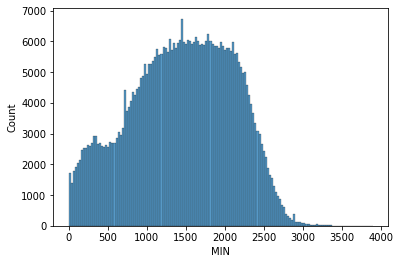

In [36]:
sns.histplot(data=df, x="MIN")

In [37]:
# correlation change with different MIN played PTS
pd.set_option('display.max_rows', 500)

params_list = []
df_low_MIN = df[df['MIN'] < 500]
df_high_MIN = df[df['MIN'] >= 500]
params_list.append(df_low_MIN[df_low_MIN.columns[1:]].corr()['PTS'][:])
params_list.append(df_high_MIN[df_high_MIN.columns[1:]].corr()['PTS'][:])
df_params = pd.concat(params_list, axis=1)
df_params 

,PTS,PTS
HOME_TEAM_ID,-0.005791,-0.005942
TEAM_ID,0.001638,-0.011483
OPPO_ID,-0.000662,-0.002972
PLAYER_ID,0.042181,-0.011463
MIN,0.353090,0.681017
FGM,0.924207,0.953298
FGA,0.622031,0.860095
FG_PCT,0.739948,0.399760
FG3M,0.525432,0.523808
FG3A,0.308934,0.461273


In [38]:
# regression change with different MIN played PTS
y_low = df_low_MIN['PTS']
X_low = df_low_MIN.iloc[:, 22:-1]
X_low = X_low.drop(columns=['PTS', 'PLUS_MINUS'])
X_low = sm.add_constant(X_low)
m_low = sm.OLS(y_low, X_low).fit()

y_high = df_high_MIN['PTS']
X_high = df_high_MIN.iloc[:, 22:-1]
X_high = X_high.drop(columns=['PTS', 'PLUS_MINUS'])
X_high = sm.add_constant(X_high)
m_high = sm.OLS(y_high, X_high).fit()


                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     6.113
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          4.06e-243
Time:                        13:38:20   Log-Likelihood:                -89438.
No. Observations:               45639   AIC:                         1.796e+05
Df Residuals:                   45293   BIC:                         1.826e+05
Df Model:                         345                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     1063.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:38:46   Log-Likelihood:            -1.2719e+06
No. Observations:              400048   AIC:                         2.545e+06
Df Residuals:                  399702   BIC:                         2.548e+06
Df Model:                         345                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [39]:
print(m_low.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     6.113
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          4.06e-243
Time:                        13:38:48   Log-Likelihood:                -89438.
No. Observations:               45639   AIC:                         1.796e+05
Df Residuals:                   45293   BIC:                         1.826e+05
Df Model:                         345                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [40]:
print(m_high.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     1063.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:38:56   Log-Likelihood:            -1.2719e+06
No. Observations:              400048   AIC:                         2.545e+06
Df Residuals:                  399702   BIC:                         2.548e+06
Df Model:                         345                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [41]:
# further check bench or not
# correlation change with different start position PLUS_MINUS
pd.set_option('display.max_rows', 500)
start_positions = ['B', 'C', 'F', 'G']
params_list = []
for start_position in start_positions:
    df_position = df_high_MIN[df_high_MIN[f'START_POSITION_{start_position}'] == 1]
    params_list.append(df_position[df_position.columns[1:]].corr()['PTS'][:])
df_params = pd.concat(params_list, axis=1)
df_params # should split to two models (Bench or not)

,PTS,PTS,PTS,PTS
HOME_TEAM_ID,0.001628,0.017020,-0.030810,0.002329
TEAM_ID,0.000817,0.018112,-0.054003,0.005840
OPPO_ID,0.000590,0.009915,-0.006416,-0.005284
PLAYER_ID,0.022094,0.074096,-0.059027,0.048636
MIN,0.614433,0.596289,0.601246,0.569203
FGM,0.944673,0.949001,0.945387,0.943264
FGA,0.804701,0.845267,0.837986,0.829100
FG_PCT,0.474375,0.367279,0.462311,0.498078
FG3M,0.592992,0.333836,0.411400,0.561027
FG3A,0.480990,0.309306,0.318288,0.487278


In [42]:
# further check bench or not
# regression change with different MIN played PTS
df_high_MIN_bench = df_high_MIN[df_high_MIN['START_POSITION_B'] == 1]
df_high_MIN_not_bench = df_high_MIN[df_high_MIN['START_POSITION_B'] == 0]
y_high_bench = df_high_MIN_bench['PTS']
X_high_bench = df_high_MIN_bench.iloc[:, 22:-1]
X_high_bench = X_high_bench.drop(columns=['PTS', 'PLUS_MINUS'])
X_high_bench = sm.add_constant(X_high_bench)
m_high_bench = sm.OLS(y_high_bench, X_high_bench).fit()
print(m_high_bench.summary())
    

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     153.5
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:57:14   Log-Likelihood:            -5.2490e+05
No. Observations:              173977   AIC:                         1.050e+06
Df Residuals:                  173634   BIC:                         1.054e+06
Df Model:                         342                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
loc                   

In [43]:
y_high_not_bench = df_high_MIN_not_bench['PTS']
X_high_not_bench = df_high_MIN_not_bench.iloc[:, 22:-1]
X_high_not_bench = X_high_not_bench.drop(columns=['PTS', 'PLUS_MINUS'])
X_high_not_bench = sm.add_constant(X_high_not_bench)
X_high_not_bench = sm.OLS(y_high_not_bench, X_high_not_bench).fit()
print(X_high_not_bench.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     491.0
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:57:32   Log-Likelihood:            -7.3979e+05
No. Observations:              226071   AIC:                         1.480e+06
Df Residuals:                  225726   BIC:                         1.484e+06
Df Model:                         344                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [44]:
# further check bench or not
# regression change with different MIN played PLUS_MINUS
df_high_MIN_bench = df_high_MIN[df_high_MIN['START_POSITION_B'] == 1]
df_high_MIN_not_bench = df_high_MIN[df_high_MIN['START_POSITION_B'] == 0]
y_high_bench = df_high_MIN_bench['PLUS_MINUS']
X_high_bench = df_high_MIN_bench.iloc[:, 22:-1]
X_high_bench = X_high_bench.drop(columns=['PTS', 'PLUS_MINUS'])
X_high_bench = sm.add_constant(X_high_bench)
m_high_bench = sm.OLS(y_high_bench, X_high_bench).fit()
print(m_high_bench.summary())

                            OLS Regression Results                            
Dep. Variable:             PLUS_MINUS   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     18.65
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:33:30   Log-Likelihood:            -6.4023e+05
No. Observations:              173977   AIC:                         1.281e+06
Df Residuals:                  173634   BIC:                         1.285e+06
Df Model:                         342                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
loc                   

In [45]:
y_high_not_bench = df_high_MIN_not_bench['PLUS_MINUS']
X_high_not_bench = df_high_MIN_not_bench.iloc[:, 22:-1]
X_high_not_bench = X_high_not_bench.drop(columns=['PTS', 'PLUS_MINUS'])
X_high_not_bench = sm.add_constant(X_high_not_bench)
X_high_not_bench = sm.OLS(y_high_not_bench, X_high_not_bench).fit()
print(X_high_not_bench.summary())

                            OLS Regression Results                            
Dep. Variable:             PLUS_MINUS   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     87.53
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:33:52   Log-Likelihood:            -8.7636e+05
No. Observations:              226071   AIC:                         1.753e+06
Df Residuals:                  225726   BIC:                         1.757e+06
Df Model:                         344                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 